Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Part 1: Data Preprocessing

In [2]:
file_path = "AirQualityUCI.xlsx"
data = pd.read_excel(file_path)

In [3]:
data = data.iloc[:, 2:] #Dropping date and time columns
data = data.replace(-200, np.nan).dropna()

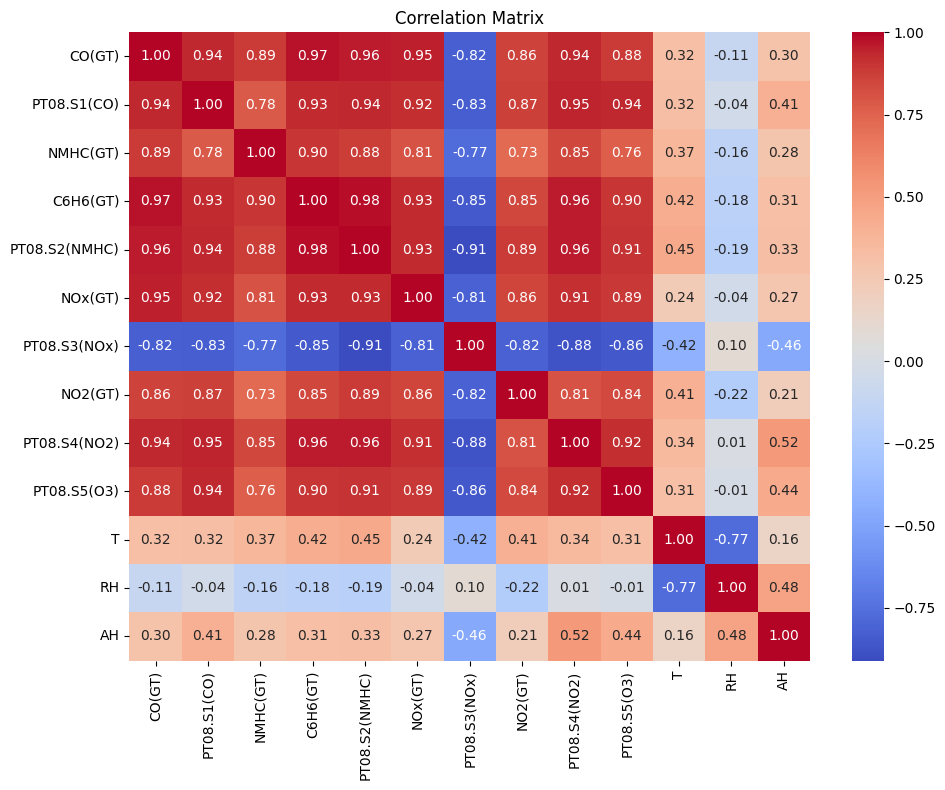

In [ ]:
# Correlation Matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()  # Adjust the layout
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")  # Increase DPI and use tight bounding box
plt.show()  # Display the plot
plt.close()

In [5]:
# Label and feature selection
label = 'PT08.S4(NO2)'
features = correlation_matrix[label].nlargest(5).index.drop(label)
selected_data = data[list(features) + [label]]

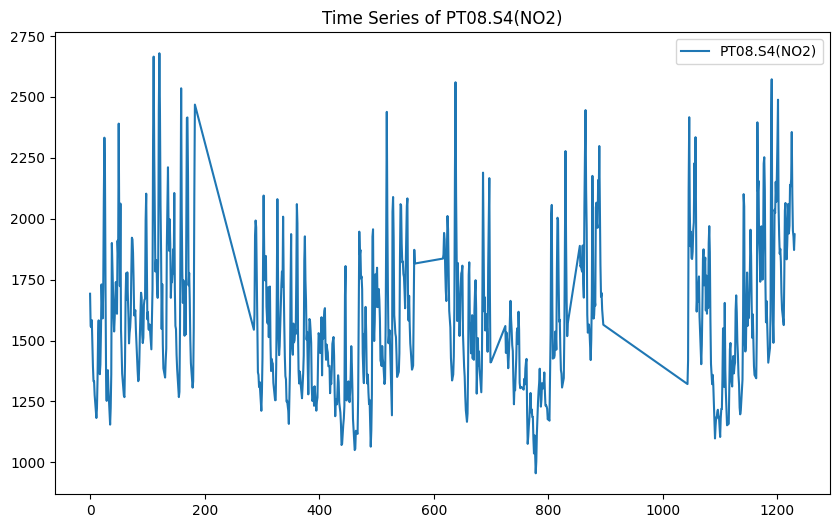

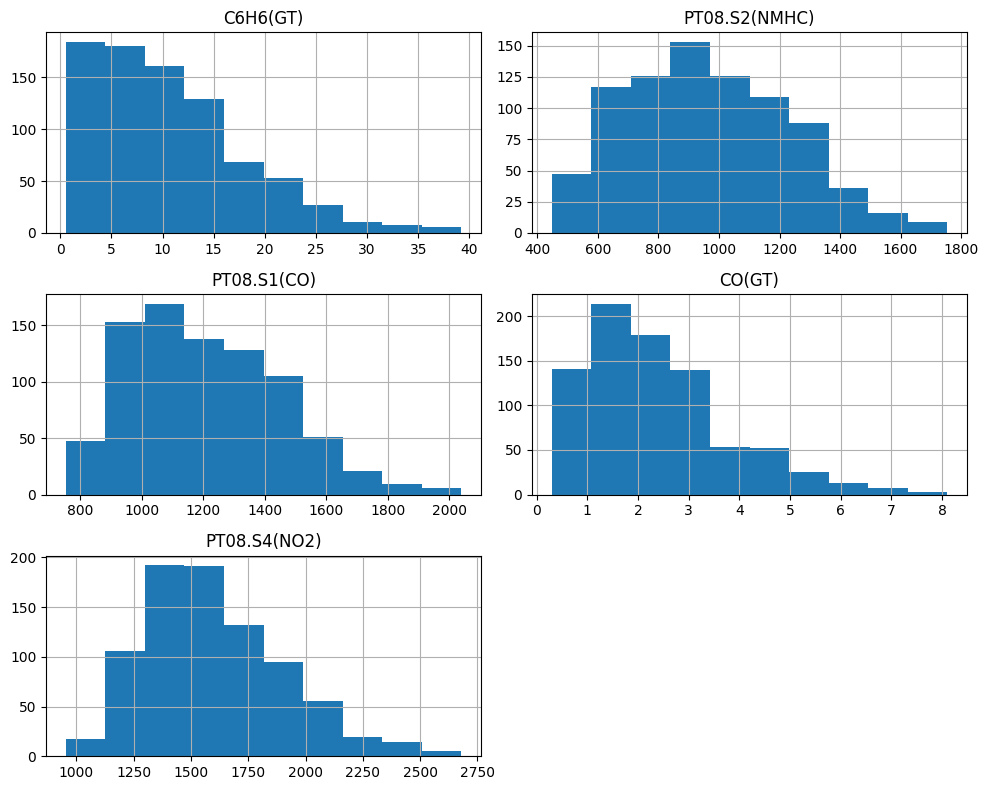

In [6]:
# Graph Visualization
plt.figure(figsize=(10, 6))
plt.plot(selected_data.index, selected_data[label], label=label)
plt.legend()
plt.title("Time Series of PT08.S4(NO2)")
plt.savefig("time_series_label.png")
plt.show()  # Displaying the plot
plt.close()

selected_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.savefig("data_histograms.png")
plt.show()
plt.close()

In [7]:
# Normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

In [8]:
# Sequence Creation
def create_sequences(data, sequence_length=10):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length, :-1])
        labels.append(data[i + sequence_length - 1, -1])
    return np.array(sequences), np.array(labels)

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length=sequence_length)

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Part 2: Modeling and Evaluation

In [10]:
# RNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, X.shape[2])),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss=MeanSquaredError())
rnn_model.fit(X_train, y_train, epochs=20, validation_split=0.2)
rnn_model.save("rnn_model.keras")

Epoch 1/20


c:\Users\amrit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0796 - val_loss: 0.0168
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129 - val_loss: 0.0060
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0020

In [11]:
# LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss=MeanSquaredError())
lstm_model.fit(X_train, y_train, epochs=20, validation_split=0.2)
lstm_model.save("lstm_model.keras")

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1118 - val_loss: 0.0164
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0197 - val_loss: 0.0147
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 - val_loss: 0.0123
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - val_loss: 0.0116
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - val_loss: 0.0104
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078 - val_loss: 0.0094
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - val_loss: 0.0085
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - val_loss: 0.0073
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_l

In [12]:
# Predictions
rnn_model = tf.keras.models.load_model("rnn_model.keras")
lstm_model = tf.keras.models.load_model("lstm_model.keras")

y_pred_rnn = rnn_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


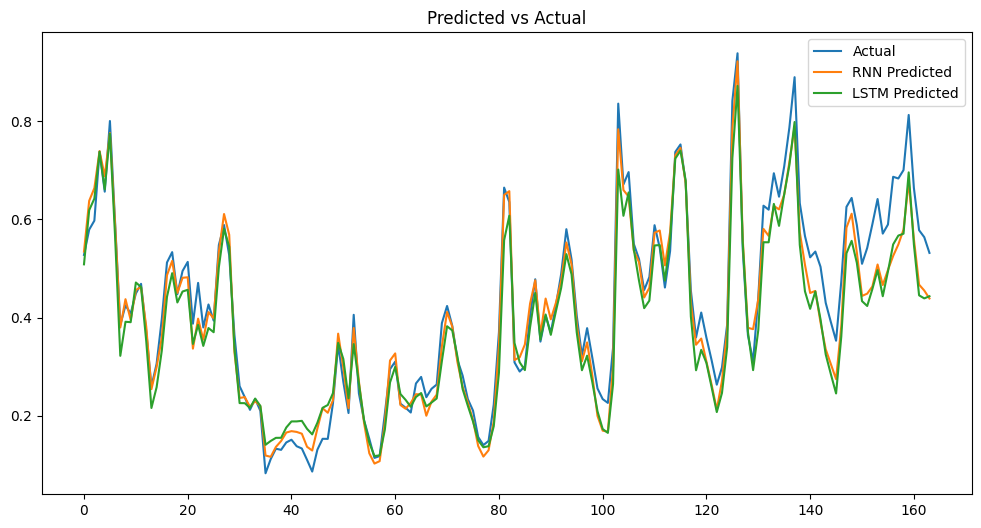

In [13]:
# Visualization of Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(y_pred_rnn, label="RNN Predicted")
plt.plot(y_pred_lstm, label="LSTM Predicted")
plt.legend()
plt.title("Predicted vs Actual")
plt.savefig("predicted_vs_actual.png")
plt.show()
plt.close()

# Part 3: Bias and Variance

In [14]:
# Loading Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Creating subsets
subsets = np.array_split(X_train, 10)
labels_subsets = np.array_split(y_train, 10)

In [16]:
# Training models and calculating errors
train_errors, test_errors = [], []
for i in range(10):
    clf = DecisionTreeClassifier()
    clf.fit(subsets[i], labels_subsets[i])
    train_pred = clf.predict(subsets[i])
    test_pred = clf.predict(X_test)
    train_errors.append(mean_squared_error(labels_subsets[i], train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

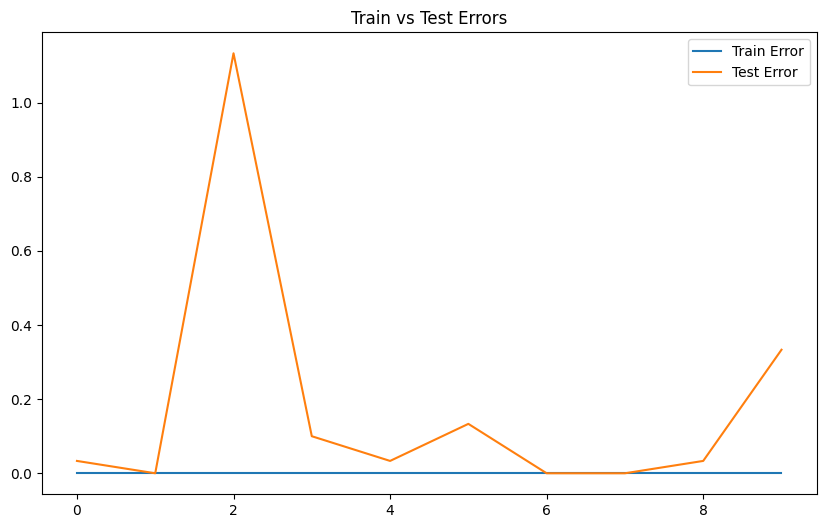

In [17]:
# Error graph
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.legend()
plt.title("Train vs Test Errors")
plt.savefig("train_test_errors.png")
plt.show()
plt.close()